<hr/>

# Intro to Data Science

01/31/2020

**Jiahao(Jason) Shi** - jshi35@jhu.edu <br/>
**Office Hour** - M 10:00 ~ 11:00am $~$ Whitehead 212 (Whitehead Hall Second Level Common Area) <br/>
**Section**$~~~~~~$ - F 3:00 ~ 3:50pm $~~~$ Maryland 104
<br>

## Section 3

1.  Least sqaure
-  Fit generalized linear model
-  PCA 
-  Q & A
<hr/>

## <font color='grey'>Unhomework 1</font>
### Question:
A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a +b\,x$

$\displaystyle \hat{\boldsymbol\theta} = \arg\min \sum_i \big[y_i-(a + b\,x_i)\big]^2$

Derive the best fit parameters of $(a,b)$

### Answer: ( There are two ways to solve this question )
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
### <font color='blue'>First solution</font>
Let 
\begin{eqnarray}
        \theta = \sum_i \big[y_i-(a + b x_i)\big]^2
\end{eqnarray}
take derivatives with resepect to $a$ and $b$, and set them to be $0$, we have
  \begin{eqnarray}
        \frac{\partial \theta}{\partial a} &=& -2 \sum_i (y_i-(a+b x_i)) = 0 \\
        \frac{\partial \theta}{\partial b} &=& -2 \sum_i x_i(y_i-(a+b x_i)) = 0
   \end{eqnarray}
which is eqaul to 
    \begin{eqnarray}
        \sum_i y_i &=& aN + b \sum_i x_i \\ 
        \sum_i x_i y_i &=& a\sum_i x_i + b \sum_i x_i^2
   \end{eqnarray}
By solving the above two equations, we can obtain
    \begin{eqnarray}
        \hat{a} &=& \bar{y} - \hat{b}\bar{x} \\
        \hat{b} &=& \frac{\sum_i(x_i - \bar{x})(y_i - \bar{y})}{\sum_i(x_i - \bar{x})^2} 
        = \frac{N\sum_i x_i y_i - (\sum_i x_i)(\sum_i y_i)}{N\sum_i x_i^2 - (\sum_i x_i)^2}
   \end{eqnarray}
where $\bar{x}=\frac{1}{N}\sum_i x_i$ and $\bar{y}=\frac{1}{N}\sum_i y_i$.



<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

### <font color='blue'>Second solution</font>

Find $\hat{\beta} = [\hat{a}, \hat{b}]^T$ minimize 
 \begin{eqnarray}
     \theta &=& \sum_i \big[y_i-(a + b x_i)\big]^2 \\
     &=& (y - X\beta)^T(y - X\beta) \\
     &=& y^T y - y^T X\beta - \beta^T X^T y + \beta^T X^T X\beta
 \end{eqnarray}

Similarly, computing the partial derivatives of $\theta$ with respect to $\beta$ and setting it to $0$ gives
 \begin{eqnarray}
     \frac{\partial \theta}{\partial \beta} = -2X^T y + 2 X^T X\beta = 0 
 \end{eqnarray}
 and thus $\hat{\beta} = (X^T X)^{-1}X^T y$.



## <font color='grey'>Unhomework 2
    
### Question:
(1) Fit a 3rd order polynomial to the same data
    
(2) Fit $f(x;\beta_0,\beta_1) = \beta_0\sin(x) + \beta_1\cos(x)$

(3) Evaluate the best fits on a grid of 1000 equally-spaced points in $[-1,4]$

(4) Plot them in one figure </font>

In [1]:
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


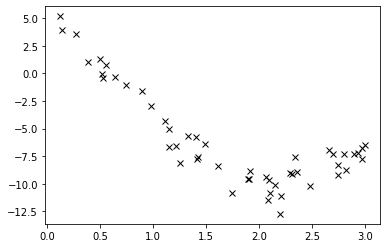

In [2]:
# same data from class note
x = 3 * random.rand(50) # between 0 and 3
e = 1 * random.randn(x.size) # noise
y = 10*cos(x+1) + e;  plot(x,y,'kx');

In [21]:
import seaborn as sns

In [6]:
# 1. Fit a 3rd order polynomial to the same data: 
# f(x) = b0 + b1 x + b2 * x^2 + b3 * x^3
X = ones((x.size,4));
X[:,1] = x
X[:,2] = x**2
X[:,3] = x**3

# X is a bunch of polynomials on the columns
X.shape

(50, 4)

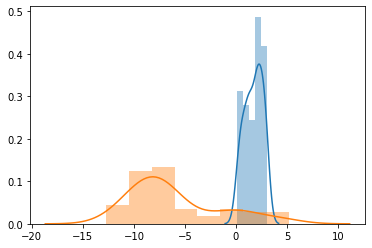

In [37]:
sns.distplot(x);
sns.distplot(y)

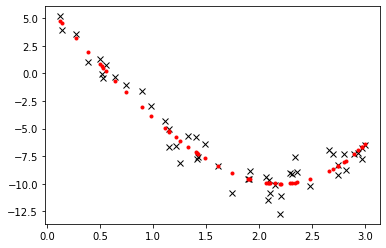

In [31]:
Xpinv = inv(X.T @ X) @ X.T
bHat1 = Xpinv @ y
yHat1 = X @ bHat1

plot(x,y, 'kx')
plot(x, yHat1, 'r.')

array([-8.7535331 ,  5.01397769])

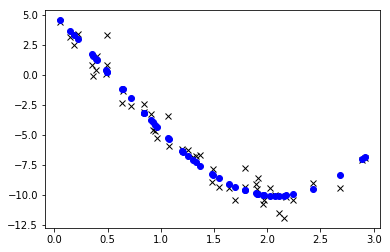

In [5]:
# 2. Fit f(x, beta0, beta1) = beta0 sin(x) + beta1 cos(x) 
X = ones((x.size,2)); 
X[:,0] = sin(x)
X[:,1] = cos(x)
Xpinv = dot(inv(dot(X.T,X)),X.T)     
bHat2 = dot(Xpinv,y)
yHat2 = dot(X,bHat2)
plot(x,y,'kx'); plot(x,yHat2,'bo'); bHat2

In [6]:
# 3. Evaluate on a grid of 1000 equally-spaced points in [−1,4]
x_1000 = np.linspace(-1,4,1000)

X1_1000 = ones((x_1000.size, 4))
X1_1000[:,1] = x_1000
X1_1000[:,2] = x_1000**2
X1_1000[:,3] = x_1000**3 # 3rd order polynomial

X2_1000 = ones((x_1000.size, 2))
X2_1000[:,0] = sin(x_1000)
X2_1000[:,1] = cos(x_1000) # Fit f(x, beta0, beta1) = beta0 sin(x) + beta1 cos(x) 

yHat1_1000 = dot(X1_1000, bHat1)
yHat2_1000 = dot(X2_1000, bHat2)

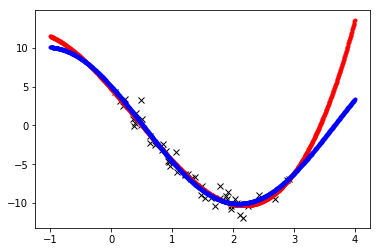

In [7]:
# 4. Plot them in one figure
plot(x,y,'kx'); 
plot(x_1000,yHat1_1000,'r.')
plot(x_1000,yHat2_1000,'b.')

### Procedure of PCA

- Given Data matrix 
> $ X = (x_{ij})_{n \times m} $


- Centering
> $X_{new} = X - mean(X)$

- Decomposition
> Original data matrix 
 - $ X_{new} = U W V^T$
>
> Sample covariance matrix 
 - $\displaystyle  C = \frac{1}{n\!-\!1}\ X_{new} X_{new}^T = \frac{1}{n\!-\!1}\  \sum_i x_i x_i^T $
 - $ C = E \Lambda E^T $
>
> Hence 
 - $\displaystyle  C = \frac{1}{n\!-\!1}\  UWV^T\ VWU^T = \frac{1}{n\!-\!1}\ U W^2 U^T = E \Lambda E^T $
 - $ E = U $
 - $\displaystyle  \Lambda = \frac{1}{n\!-\!1}\  W^2$

- Choose first $k$ components

### How to choose k

- Percent variance
> Find the smallest number of components to explain a certain percentage of the total variance, i.e., keep the top $k$ components where $k$ is the smallest integer between 1 and $m$ such that

$$ \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{i=1}^{m} \lambda_i}\ge \alpha $$

### How to implement in python

1. Centering: $X_{new} = X - mean(X)$
2. Sample covariance matrix: $\displaystyle  C = \frac{1}{n\!-\!1}\ X_{new} X_{new}^T $
3. Decomposition: using **np.linalg.eig** OR **np.linalg.svd**

(2, 50)


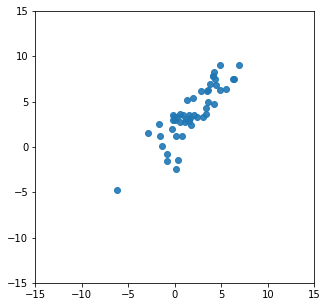

In [13]:
from scipy.stats import norm
# generate multiple 2-D (column) vectors
S = norm.rvs(0,1,(2,50))
S[0,:] *= 4  # scale axis 0
f = pi/4    # rotate by 45 degrees
R = array([[cos(f), -sin(f)],
           [sin(f),  cos(f)]]) 
X = R.dot(S)
X += np.array([[1],[3]]) # shift
print(X.shape)

figure(figsize=(5,5)); xlim(-15,15); ylim(-15,15);
plot(X[0,:],X[1,:],'o',alpha=0.9)

In [14]:
# Subtract sample mean (centering)
avg = mean(X, axis=1).reshape(X[:,1].size,1)
X -= avg

# Sample covariance matrix
C = X.dot(X.T) / (X[0,:].size-1) 
print ("Average\n", avg)
print ("Sample covariance\n", C)

Average
 [[1.81876447]
 [3.80947021]]
Sample covariance
 [[6.63356497 6.70988078]
 [6.70988078 9.15253945]]


In [15]:
# Eigen decomposition of sample covariance matrix
L, E = np.linalg.eig(C)
E, L

(array([[-0.76957276, -0.63855914],
        [ 0.63855914, -0.76957276]]), array([ 1.06598783, 14.7201166 ]))

In [45]:
# Singular value decomposition of data matrix yields also the same
U, W, V = np.linalg.svd(X) # X is the data after centering
U, W**2 / (X[0,:].size-1)

(array([[-0.63855914, -0.76957276],
        [-0.76957276,  0.63855914]]), array([14.7201166 ,  1.06598783]))

In [47]:
# We can also apply singular value decomposition on C
E2, L2, E_same = np.linalg.svd(C) 
E2, L2

(array([[-0.63855914, -0.76957276],
        [-0.76957276,  0.63855914]]), array([14.7201166 ,  1.06598783]))

In [17]:
# Principle components from sklearn
from sklearn import decomposition
# Object-oriented interface
pca = decomposition.PCA(n_components=X[:,0].size)

# sklearn uses a different convention
pca.fit(X.T) # note the transpose

# pca.transform(X.T)

# E and Lambda
print (pca.components_.T, pca.explained_variance_)

[[-0.63855914  0.76957276]
 [-0.76957276 -0.63855914]] [14.7201166   1.06598783]


In [22]:
E

array([[-0.76957276, -0.63855914],
       [ 0.63855914, -0.76957276]])

In [21]:
E[:,:1]

array([[-0.76957276],
       [ 0.63855914]])

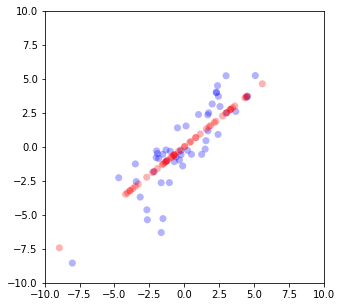

In [24]:
# Projected points
P = E[:1,:].T.dot(E[:1,:]).dot(X)

# Plot
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(X[0,:],X[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P[0,:],P[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');

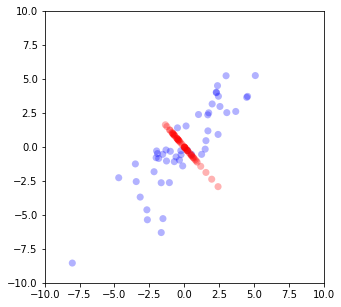

In [26]:
# Projected points
P = E[1:,:].T.dot(E[1:,:]).dot(X)

# Plot
figure(figsize=(5,5)); xlim(-10,10); ylim(-10,10);
scatter(X[0,:],X[1,:],marker='o',color='b', s=50, alpha=0.3, edgecolor='none');
scatter(P[0,:],P[1,:],marker='o',color='r', s=50, alpha=0.3, edgecolor='none');

## <font color='darkgreen'>Application of PCA </font>

Principal components analysis (PCA) is one of a family of techniques for taking
high-dimensional data, and using the dependencies between the variables to represent
it in a more tractable, lower-dimensional form, without losing too much information.
PCA is one of the simplest and most robust ways of doing such dimensionality
reduction.

In [40]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [43]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [45]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
print(df.shape)

(569, 30)


In [55]:
print(np.amin(df.values), np.amax(df.values))

0.0 4254.0


In [47]:
# Preprocess: scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
L = pca.explained_variance_

/Users/alex/.pyenv/versions/38/lib/python3.8/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


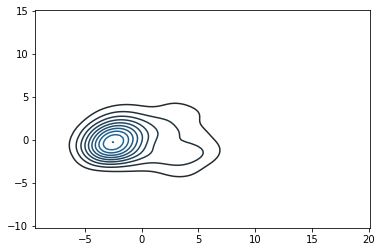

In [61]:
sns.kdeplot(x_pca)

In [36]:
scaled_data.shape

(569, 30)

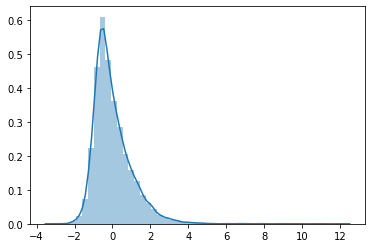

In [57]:
sns.distplot(scaled_data)

In [38]:
x_pca.shape

(569, 5)

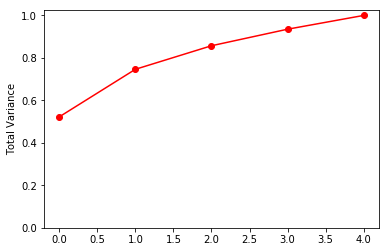

In [39]:
# Plot cumsum(Lambda) / sum(Lambda), i.e. how much variance are explained by first k PCs
cl = np.cumsum(L); 
ylabel('Total Variance');
plot(cl/cl[-1], 'o-r'); 
ylim(0, None);

Text(0, 0.5, 'Second column of dataset')

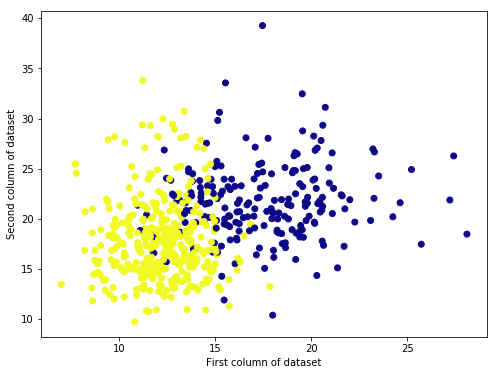

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First column of dataset')
plt.ylabel('Second column of dataset')

Text(0, 0.5, 'Second Principal Component')

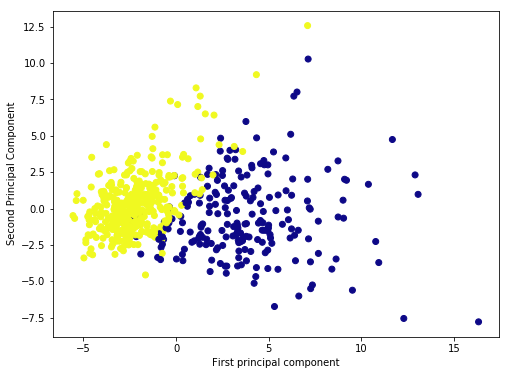

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')